In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== NURSE STRESS SENSOR DATA - EXPLORATORY DATA ANALYSIS ===\n")

In [ ]:
# 1. DATA LOADING & INITIAL INSPECTION
print("1. DATA LOADING & INITIAL INSPECTION")
print("="*50)

df = pd.read_csv(r'C:\Users\Michi\nurse-stress-wearables\data\merged_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

C:\Users\Michi\AppData\Local\Temp\ipykernel_33200\561198610.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Michi\nurse-stress-wearables\data\merged_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [ ]:
# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"Unique rows: {df.shape[0] - df.duplicated().sum()}")

Duplicate rows: 105606



2. MISSING DATA ANALYSIS
          Missing Count  Missing Percentage
X                     0                 0.0
Y                     0                 0.0
Z                     0                 0.0
EDA                   0                 0.0
HR                    0                 0.0
TEMP                  0                 0.0
id                    0                 0.0
datetime              0                 0.0
label                 0                 0.0


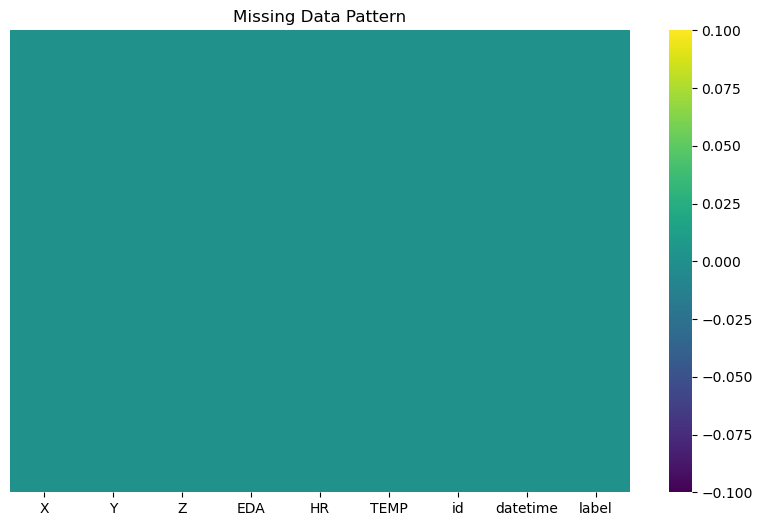

In [8]:
# 2. MISSING DATA ANALYSIS
print("\n2. MISSING DATA ANALYSIS")
print("="*30)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_summary)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')
plt.show()

In [9]:
# 3. TEMPORAL DATA HANDLING
print("\n3. TEMPORAL DATA HANDLING")
print("="*30)

# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])
print(f"DateTime range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Total duration: {df['datetime'].max() - df['datetime'].min()}")

# Check sampling frequency
time_diffs = df['datetime'].diff().dropna()
print(f"\nSampling intervals (seconds):")
print(f"Mean: {time_diffs.dt.total_seconds().mean():.2f}")
print(f"Median: {time_diffs.dt.total_seconds().median():.2f}")
print(f"Mode: {time_diffs.dt.total_seconds().mode().iloc[0]:.2f}")

# Set datetime as index
df_temporal = df.set_index('datetime').copy()
print(f"\nData continuity check - gaps > 1 minute: {(time_diffs > pd.Timedelta('1min')).sum()}")


3. TEMPORAL DATA HANDLING
DateTime range: 2020-04-14 22:31:00 to 2020-12-13 08:01:00
Total duration: 242 days 09:30:00

Sampling intervals (seconds):
Mean: 0.11
Median: 0.03
Mode: 0.03

Data continuity check - gaps > 1 minute: 177



4. TARGET VARIABLE (STRESS LABELS) ANALYSIS
Label distribution:
label
2.0    8540583
0.0    2162246
1.0     806222
Name: count, dtype: int64

Label percentages:
label
2.0    74.21
0.0    18.79
1.0     7.01
Name: count, dtype: float64


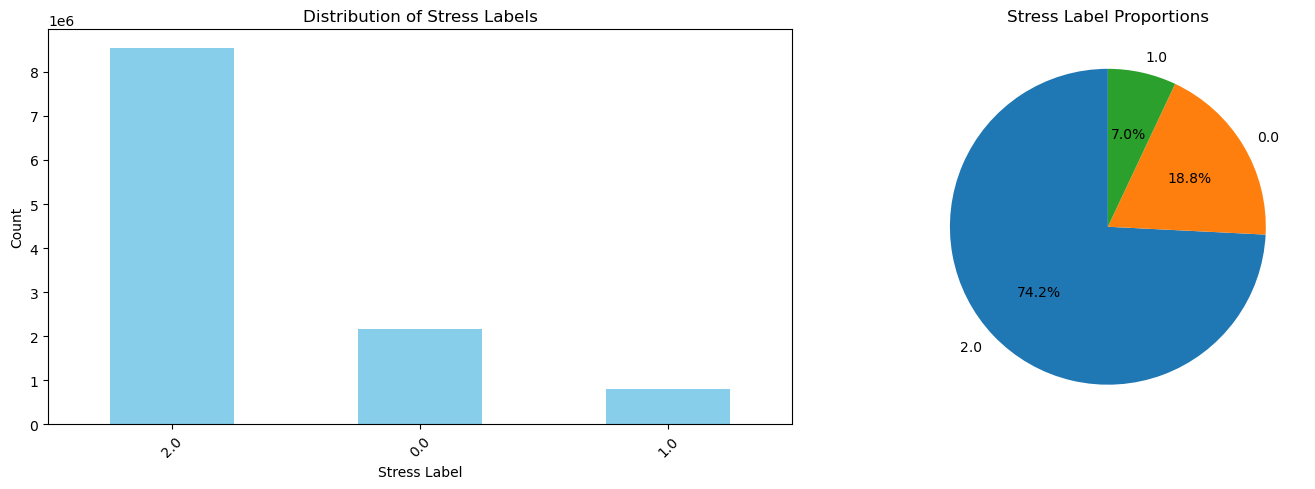

In [10]:
# 4. TARGET VARIABLE ANALYSIS
print("\n4. TARGET VARIABLE (STRESS LABELS) ANALYSIS")
print("="*45)

print("Label distribution:")
label_counts = df['label'].value_counts()
print(label_counts)
print(f"\nLabel percentages:")
print((label_counts / len(df) * 100).round(2))

# Visualize label distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
label_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribution of Stress Labels')
ax1.set_xlabel('Stress Label')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Stress Label Proportions')

plt.tight_layout()
plt.show()


5. SUBJECT-LEVEL ANALYSIS
Subject statistics:
    Record_Count                    Start_Time                      End_Time  \
id                                                                             
15        262144 2020-07-08 13:09:00.000000000 2020-07-24 13:22:31.750000128   
83       1310720 2020-10-30 06:44:18.687500032 2020-12-13 08:01:00.000000000   
94        524288 2020-05-09 22:28:00.000000000 2020-07-02 20:58:00.031249920   
15         46987 2020-07-24 13:22:31.781250048 2020-07-31 20:13:00.000000000   
5C        865930 2020-04-14 22:31:00.000000000 2020-06-25 17:26:00.000000000   
6B        825549 2020-06-23 15:46:00.000000000 2020-06-30 15:39:00.000000000   
6D        591363 2020-07-16 14:49:00.000000000 2020-07-16 20:19:00.000000000   
7A       1377342 2020-04-18 18:52:00.000000000 2020-07-07 13:44:00.000000000   
7E        253447 2020-10-21 18:46:00.000000000 2020-11-05 20:50:00.000000000   
83         62099 2020-10-30 06:25:00.000000000 2020-12-12 03:13:00.000000

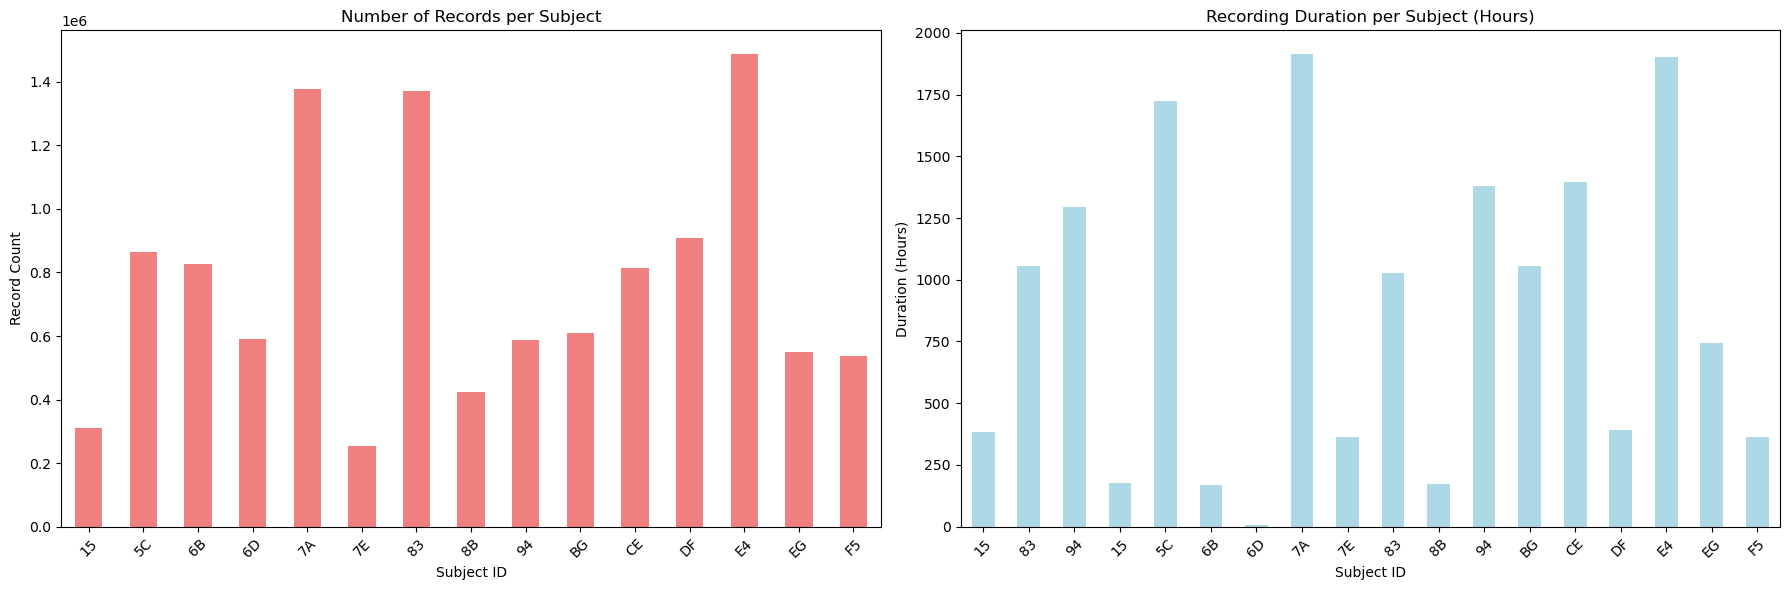


Stress label distribution by subject:
label    0.0    1.0     2.0
id                         
15      5.13   0.00   94.87
83     12.45   0.00   87.55
94     66.54  16.68   16.78
15      0.00   0.00  100.00
5C     35.70  34.15   30.16
6B     13.02   0.00   86.98
6D     85.06   0.00   14.94
7A      3.35  28.21   68.45
7E     46.21   0.00   53.79
83      0.00   0.00  100.00
8B     32.62   0.00   67.38
94     27.96   0.00   72.04
BG      3.47   0.00   96.53
CE      0.00   2.36   97.64
DF      7.19   0.00   92.81
E4     18.90   1.03   80.07
EG      0.00   0.00  100.00
F5      5.73   0.00   94.27


<Figure size 1400x800 with 0 Axes>

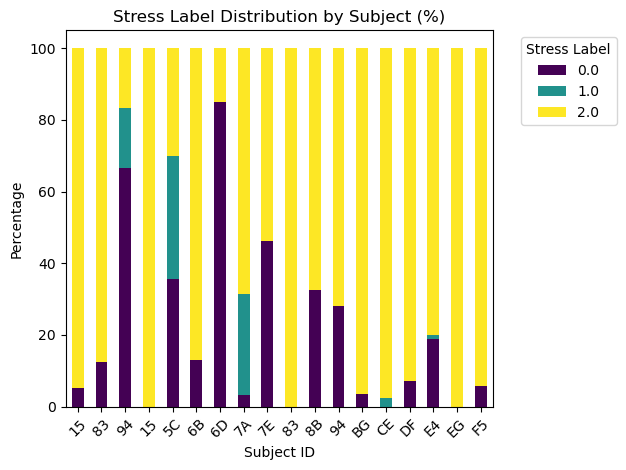

In [12]:
# 5. SUBJECT-LEVEL ANALYSIS
print("\n5. SUBJECT-LEVEL ANALYSIS")
print("="*30)

# Basic subject statistics (remove .round(2) which causes issues with mixed types)
subject_stats = df.groupby('id').agg({
    'datetime': ['count', 'min', 'max'],
    'label': lambda x: x.value_counts().to_dict()
})

subject_stats.columns = ['Record_Count', 'Start_Time', 'End_Time', 'Label_Distribution']
print("Subject statistics:")
print(subject_stats.head(10))

# Calculate recording duration per subject
subject_duration = df.groupby('id')['datetime'].agg(['min', 'max'])
subject_duration['Duration_Hours'] = (subject_duration['max'] - subject_duration['min']).dt.total_seconds() / 3600
print(f"\nRecording duration per subject (hours):")
print(subject_duration['Duration_Hours'].describe())

# Visualize data distribution across subjects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Records per subject - convert id to string for consistent sorting
subject_counts = df['id'].astype(str).value_counts().sort_index()
subject_counts.plot(kind='bar', color='lightcoral', ax=ax1)
ax1.set_title('Number of Records per Subject')
ax1.set_xlabel('Subject ID')
ax1.set_ylabel('Record Count')
ax1.tick_params(axis='x', rotation=45)

# Duration per subject
subject_duration['Duration_Hours'].plot(kind='bar', color='lightblue', ax=ax2)
ax2.set_title('Recording Duration per Subject (Hours)')
ax2.set_xlabel('Subject ID')
ax2.set_ylabel('Duration (Hours)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Label distribution across subjects
print(f"\nStress label distribution by subject:")
subject_label_dist = pd.crosstab(df['id'], df['label'], normalize='index') * 100
print(subject_label_dist.round(2))

# Visualize label distribution by subject
plt.figure(figsize=(14, 8))
subject_label_dist.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Stress Label Distribution by Subject (%)')
plt.xlabel('Subject ID')
plt.ylabel('Percentage')
plt.legend(title='Stress Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 6. SENSOR DATA QUALITY ASSESSMENT
print("\n6. SENSOR DATA QUALITY ASSESSMENT")
print("="*40)

# Physiological signals analysis
physiological_cols = ['EDA', 'HR', 'TEMP']
orientation_cols = ['X', 'Y', 'Z']

print("Physiological signals summary:")
physio_stats = df[physiological_cols].describe()
print(physio_stats)

print("\nOrientation data summary:")
orient_stats = df[orientation_cols].describe()
print(orient_stats)

# Check for outliers using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

print("\nOutlier detection (IQR method):")
for col in physiological_cols:
    outlier_count = detect_outliers(df, col)
    outlier_percent = (outlier_count / len(df)) * 100
    print(f"{col}: {outlier_count} outliers ({outlier_percent:.2f}%)")


6. SENSOR DATA QUALITY ASSESSMENT
Physiological signals summary:
                EDA            HR          TEMP
count  1.150905e+07  1.150905e+07  1.150905e+07
mean   3.502127e+00  8.576090e+01  3.223435e+01
std    5.656541e+00  1.419642e+01  2.260516e+00
min    0.000000e+00  5.100000e+01  2.409000e+01
25%    2.242060e-01  7.672000e+01  3.019000e+01
50%    1.157407e+00  8.390000e+01  3.257000e+01
75%    4.077436e+00  9.310000e+01  3.425000e+01
max    5.976071e+01  1.802300e+02  3.659000e+01

Orientation data summary:


In [ ]:
# 7. BASIC STATISTICAL SUMMARY
print("\n7. DETAILED STATISTICAL SUMMARY")
print("="*35)

# Overall statistics
print("Complete dataset statistics:")
print(df.describe(include='all'))

# Check for zero/negative values in physiological signals
print("\nPhysiological signal quality checks:")
for col in physiological_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {zero_count} zeros, {negative_count} negative values")

In [ ]:
# 8. INITIAL VISUALIZATIONS
print("\n8. INITIAL VISUALIZATIONS")
print("="*25)

# Time series plots of physiological signals
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Sample a subset for visualization (every 1000th point for performance)
sample_df = df.iloc[::1000].copy()

for i, col in enumerate(physiological_cols):
    axes[i].plot(sample_df['datetime'], sample_df[col], alpha=0.7, linewidth=0.5)
    axes[i].set_title(f'{col} Over Time (Sampled)')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

axes[-1].set_xlabel('DateTime')
plt.tight_layout()
plt.show()

# Distribution histograms
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(physiological_cols + orientation_cols):
    axes[i].hist(df[col].dropna(), bins=50, alpha=0.7, color=plt.cm.tab10(i))
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[physiological_cols + orientation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Sensor Variables')
plt.show()

# Stress labels over time
plt.figure(figsize=(15, 6))
# Sample for visualization
time_sample = df.iloc[::5000].copy()
colors = {'0': 'green', '1': 'orange', '2': 'red'}  # Adjust based on actual labels
for label in time_sample['label'].unique():
    mask = time_sample['label'] == label
    plt.scatter(time_sample[mask]['datetime'], time_sample[mask]['HR'], 
               c=colors.get(str(label), 'blue'), label=f'Label {label}', alpha=0.6, s=1)

plt.title('Heart Rate Over Time Colored by Stress Label')
plt.xlabel('DateTime')
plt.ylabel('Heart Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== EDA COMPLETE ===")